## PS4 

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Set parameters 
rho = 0.85
mu= 11.4
sigma = 0.7
T = 500

### a. 

In [3]:
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

In [4]:
# Simulation
z = np.zeros(T)
def simu(z_t, i):
    if i < 500:
        z_t1 = rho*z_t + (1-rho)*mu + eps_vec[i]
        z[i] = z_t1
        return simu(z[i], i+1)
    else:
        return z
z = simu(mu, 0)
z[:100]

array([12.18888469, 12.2159573 , 11.68315782, 11.01553877, 10.91590679,
       10.1567745 , 10.68040553, 10.67842452, 10.88565201, 10.72508687,
       10.65326395,  9.91791397, 10.04701032, 10.40104919,  9.86045939,
       10.12776085, 10.00300618, 10.57799829, 10.46230611, 11.28872644,
       11.27266911, 11.3207326 , 11.12438321, 13.13436557, 12.89920999,
       12.77832705, 11.29822341, 11.72133346, 11.53360466, 11.40244288,
       10.99761888, 11.95615748, 12.17992382, 11.98569528, 11.51007151,
       11.53889543, 11.62239461, 12.05084072, 12.61656985, 13.08475995,
       11.83484479, 12.02965801, 11.58664022, 11.60122697, 12.78131856,
       13.40791974, 12.73042248, 12.55257799, 11.43553918, 11.68434424,
       10.86117739, 11.45112658, 10.44432582, 10.28175407, 10.77658964,
       10.88626827, 11.24280425, 11.44757108, 11.84646005, 11.62959357,
       11.41153827, 12.06439749, 12.35733626, 11.30835897, 12.0244509 ,
       11.82656181, 11.53766332, 12.47163416, 12.39492366, 11.77

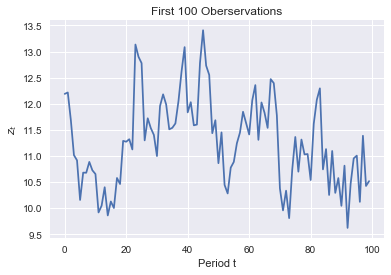

In [5]:
plt.plot(z[:100])
plt.title("First 100 Oberservations")
plt.ylabel("$z_t$")
plt.xlabel("Period t")
plt.show()

#### b.

In [6]:
lb = mu - 3*sigma
ub = mu + 3*sigma
z_vals = np.linspace(lb, ub, 5)
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

#### c.

In [7]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
bins = np.digitize(z, z_cuts)

In [8]:
P_hat = np.zeros(shape=(5,5))
for i in range(0,5):
    for j in range(0,5):
        count = 0
        total = 0
        for k in range(0,T-1):
            curr = bins[k]
            nxt = bins[k + 1]
            if curr == i and nxt == j:
                count += 1
            if curr == i:
                total += 1
        P_hat[i][j] = count/total
P_hat

array([[0.69387755, 0.26530612, 0.04081633, 0.        , 0.        ],
       [0.09166667, 0.55      , 0.325     , 0.03333333, 0.        ],
       [0.03067485, 0.2208589 , 0.48466258, 0.22699387, 0.03680982],
       [0.        , 0.04201681, 0.34453782, 0.50420168, 0.1092437 ],
       [0.        , 0.        , 0.04166667, 0.35416667, 0.60416667]])

#### d.

In [9]:
import numpy.linalg as LA
zt = np.array([0,0,1,0,0])
cond_prob = LA.matrix_power(P_hat.T, 3) @ zt
print(r'P(z_{t+3}=5|z_t=3)=', cond_prob[4])

P(z_{t+3}=5|z_t=3)= 0.08021670723338588


#### e.

In [10]:
eigvals, eigvecmat = LA.eig(P_hat.T)
print(eigvals)

[1.         0.76699244 0.576021   0.12361033 0.3702847 ]


In [11]:
print(eigvecmat)

[[-0.21569643 -0.55748862  0.47214975 -0.01733209 -0.17180269]
 [-0.49786427 -0.47702859 -0.39566684  0.37212405  0.68729659]
 [-0.66477792  0.09672098 -0.6316733  -0.78981484 -0.24150297]
 [-0.47579105  0.54815821  0.09402908  0.484713   -0.58546399]
 [-0.19313059  0.38963802  0.4611613  -0.04969012  0.31147306]]


In [12]:
eigvec = eigvecmat[:, 0] / eigvecmat[:, 0].sum()
stat_dist = eigvec
stat_dist

array([0.10535858, 0.24318563, 0.32471588, 0.23240379, 0.09433612])

The above is the stationary ergodic distribution of $z_t$ whose eigenvector has the eigenvalue equal to $\lambda = 1$.

#### f.

In [13]:
z_0 = z_vals[2]

In [14]:
x_vec = np.zeros(T)
x_t = z_0
xt_ind = 1
for t_ind in range(T):
    xtp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[xt_ind, :])).min()
    x_tp1 = z_vals[xtp1_ind]
    x_vec[t_ind] = x_tp1
    
    x_t = x_tp1
    xt_ind = xtp1_ind

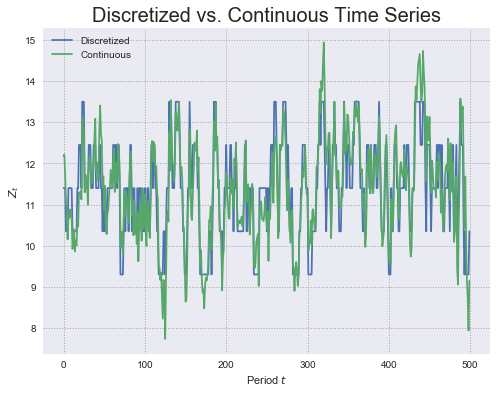

In [15]:
plt.figure(figsize=(8,6))
plt.plot(x_vec)
plt.plot(z)
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'Discretized vs. Continuous Time Series', fontsize=20)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$Z_t$')
plt.legend(['Discretized', 'Continuous'])
plt.show()